# Hotel Booking ML Project
## CRISP-DM Phase 1-2: Business & Data Understanding

This notebook covers:
1. Business Understanding
2. Data Loading & EDA
3. Data Cleaning & Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', 50)
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

## 1. Business Understanding

**Business Questions:**
1. Which bookings are likely to be cancelled?
2. What will be the demand for rooms next month?

**Success Criteria:**
- Cancellation prediction accuracy ≥ 85%
- Demand forecast MAPE < 15%

## 2. Data Loading

Dataset: Hotel Booking Demand from Kaggle

In [2]:
# Load the dataset
df = pd.read_csv('../data/raw/hotel_bookings.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")

Dataset shape: (119390, 32)

Columns: ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [3]:
# First look at the data
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
# Data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
# Statistical summary
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## 3. Exploratory Data Analysis

Overall Cancellation Rate: 37.04%


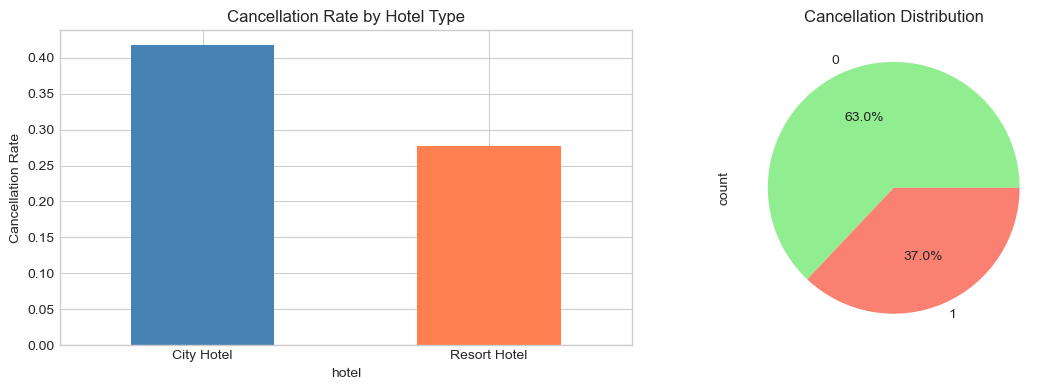

In [6]:
# Cancellation rate
cancel_rate = df['is_canceled'].mean() * 100
print(f"Overall Cancellation Rate: {cancel_rate:.2f}%")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Cancellation by hotel type
df.groupby('hotel')['is_canceled'].mean().plot(kind='bar', ax=axes[0], color=['steelblue', 'coral'])
axes[0].set_title('Cancellation Rate by Hotel Type')
axes[0].set_ylabel('Cancellation Rate')
axes[0].set_xticklabels(['City Hotel', 'Resort Hotel'], rotation=0)

# Cancellation distribution
df['is_canceled'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
axes[1].set_title('Cancellation Distribution')

plt.tight_layout()
plt.show()

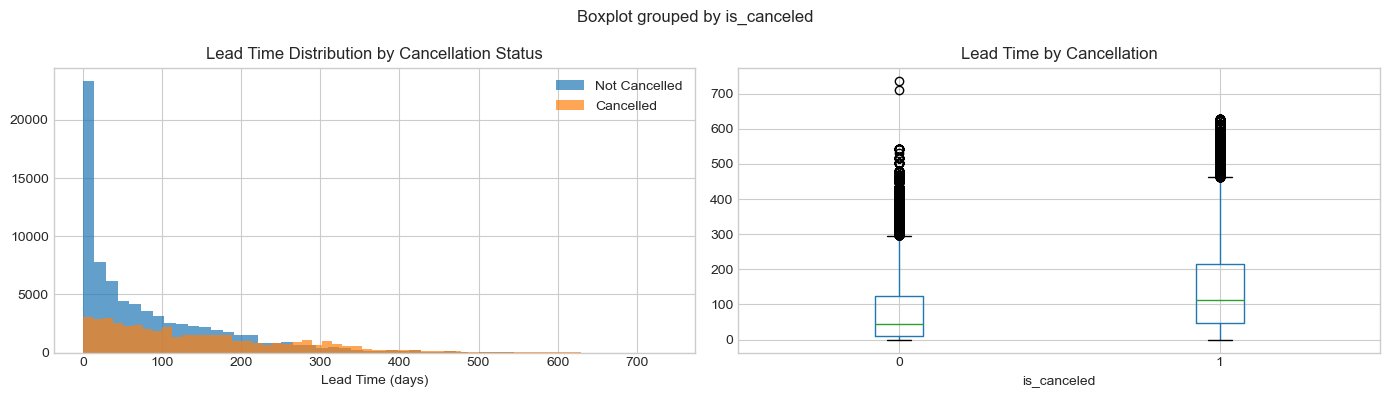

In [7]:
# Lead time distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Lead time by cancellation status
df[df['is_canceled']==0]['lead_time'].hist(ax=axes[0], bins=50, alpha=0.7, label='Not Cancelled')
df[df['is_canceled']==1]['lead_time'].hist(ax=axes[0], bins=50, alpha=0.7, label='Cancelled')
axes[0].set_title('Lead Time Distribution by Cancellation Status')
axes[0].set_xlabel('Lead Time (days)')
axes[0].legend()

# Lead time boxplot
df.boxplot(column='lead_time', by='is_canceled', ax=axes[1])
axes[1].set_title('Lead Time by Cancellation')

plt.tight_layout()
plt.show()

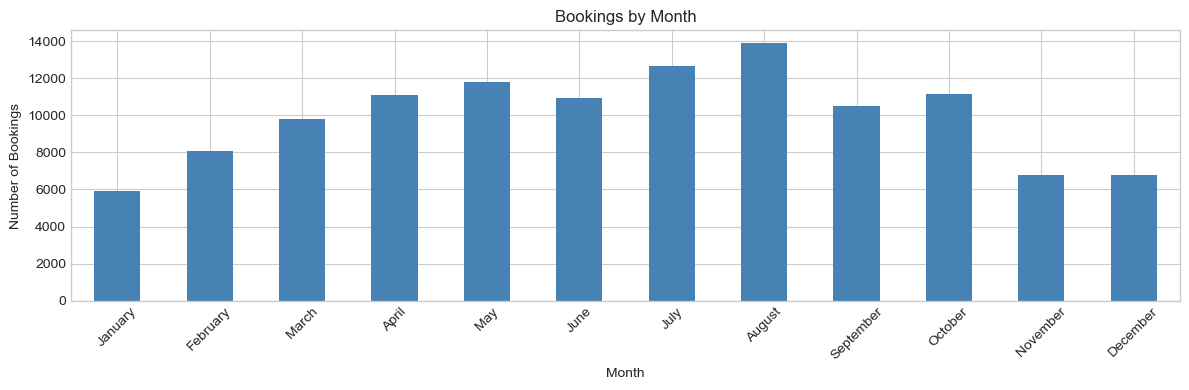

In [8]:
# Monthly booking trend
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

monthly = df.groupby('arrival_date_month').size().reindex(month_order)

plt.figure(figsize=(12, 4))
monthly.plot(kind='bar', color='steelblue')
plt.title('Bookings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

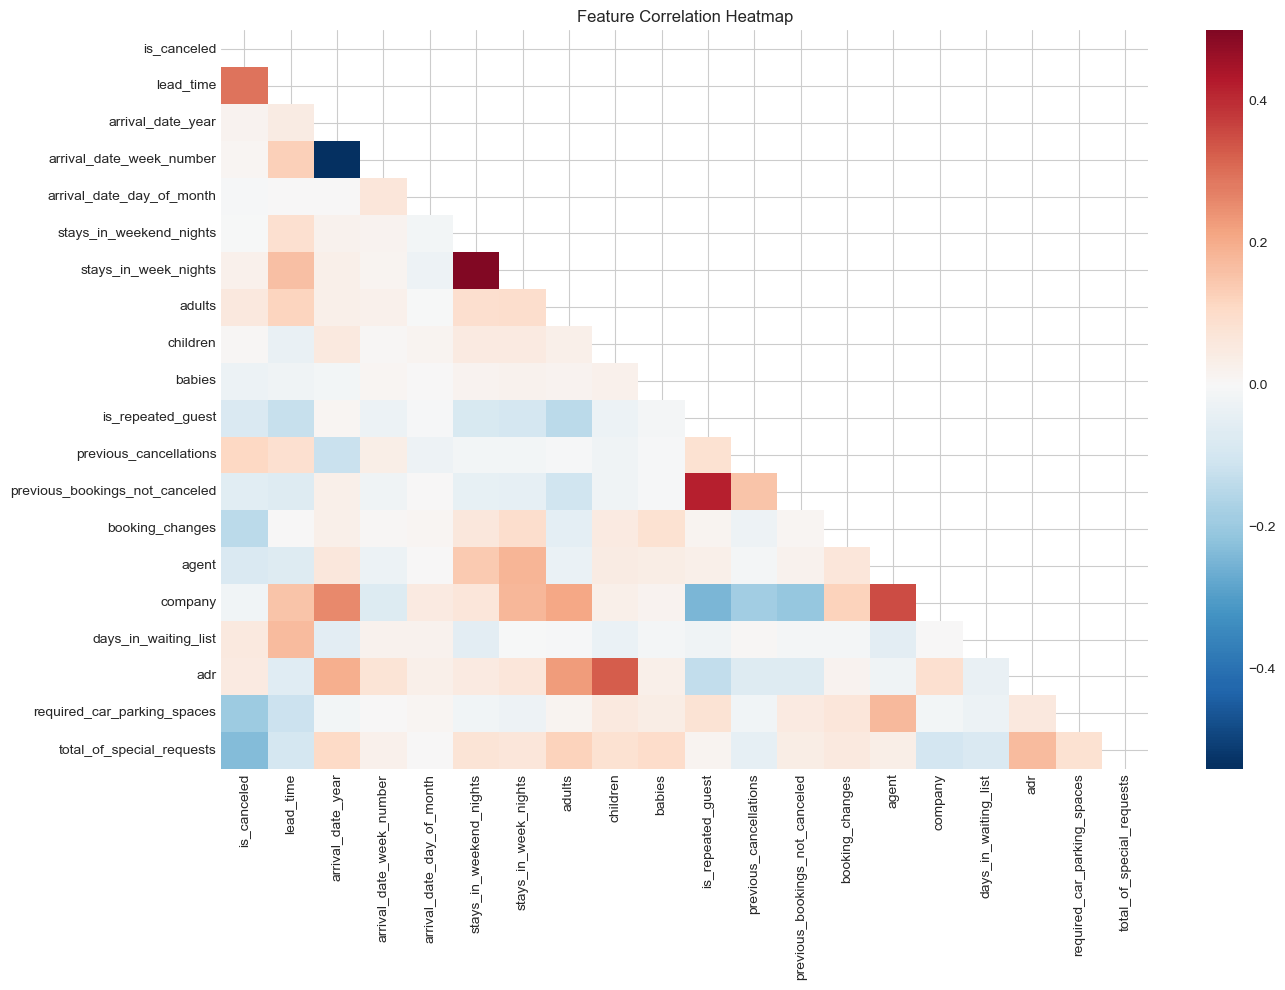

In [9]:
# Correlation heatmap for numeric features
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()

plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=False, cmap='RdBu_r', center=0)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

## 4. Missing Values Analysis

In [10]:
# Missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({'Missing': missing, 'Percentage': missing_pct})
missing_df[missing_df['Missing'] > 0].sort_values('Percentage', ascending=False)

,Missing,Percentage
company,112593,94.306893
agent,16340,13.686238
country,488,0.408744
children,4,0.003350


## 5. Save Cleaned Data

In [11]:
import sys
sys.path.insert(0, '../src')

from preprocessing import clean_data, engineer_features

# Clean and engineer features
df_clean = clean_data(df)
df_final = engineer_features(df_clean)

print(f"Original: {len(df)} rows")
print(f"After cleaning: {len(df_final)} rows")

# Save processed data
df_final.to_csv('../data/processed/hotel_bookings_processed.csv', index=False)
print("\nProcessed data saved!")

Original: 119390 rows
After cleaning: 118006 rows

Processed data saved!
